In [1]:
import pandas as pd

In [ ]:
!pip install mlxtend

In [97]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## 1. Read some data

this dataset contains several rows, Each row is actually a transaction with name of items that user bought

In [98]:
data = pd.read_csv("store_data.csv",header=None)

In [99]:
data.head(3)

0          1        2               3             4    
0   shrimp    almonds  avocado  vegetables mix  green grapes  \
1  burgers  meatballs     eggs             NaN           NaN   
2  chutney        NaN      NaN             NaN           NaN   

                 5     6               7             8             9    
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice  \
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15   
0  low fat yogurt  green tea  honey  salad  mineral water  salmon  \
1             NaN        NaN    NaN    NaN            NaN     NaN   
2             NaN        NaN    NaN    NaN            NaN     NaN   

                  16               17       18         19  
0  antioxydant juice  frozen smoothie  spinach  olive oil  
1                NaN              NaN      NaN        NaN  
2                NaN              NaN      NaN        NaN

### Small question: should we fill NaN values?

### Reformat data to the approriate format

In [17]:
records = []
num_rows = data.shape[0]
num_cols = data.shape[1]
for i in range(num_rows):
    this_row = []
    for j in range(num_cols):
        this_row.append(str(data.iloc[i,j]))
    ## add this row to records
    records.append(this_row)

In [100]:
records[1]

['burgers',
 'meatballs',
 'eggs',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

#### Use TransactionalEncoder

In [101]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)

In [102]:
te_ary

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [23]:
te.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

### notice: something wrong about this thing: NaN is also an item!?

In [ ]:
data_new = pd.DataFrame(te_ary,columns=te.columns_)

In [ ]:
data_new = data_new.drop(['nan'],axis=1)

In [104]:
data_new.head(4)

asparagus  almonds  antioxydant juice  asparagus  avocado  babies food   
0       False     True               True      False     True        False  \
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix   
0  False           False      False        False  ...   False            True  \
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   

   water spray  white wine  whole weat flour  whole wheat pasta   
0        False       False              True              False  \
1        False       False             False              False   
2        False       False             False              False   
3        False       False             False              False   

   whole wheat rice   yams  yogurt cake  zucchini  
0             False   True        False     False  
1             False  False        False     False  
2             False  False        False     False  
3             False  False        False     False  

[4 rows x 120 columns]

## 2. Let's apply the model to see what happen

In [105]:
# call apriori function and pass minimum support here we are passing 3%. 
# means 3 % times in total number of transaction the item should be present.
frequent_itemsets = apriori(data_new, min_support=0.03, use_colnames=True)

In [106]:
frequent_itemsets.head(5)

support    itemsets
0  0.033329   (avocado)
1  0.033729  (brownies)
2  0.087188   (burgers)
3  0.030129    (butter)
4  0.081056      (cake)

In [107]:
frequent_itemsets.tail(5)

support                    itemsets
49  0.039195    (spaghetti, ground beef)
50  0.047994       (milk, mineral water)
51  0.035462           (spaghetti, milk)
52  0.033729   (pancakes, mineral water)
53  0.059725  (spaghetti, mineral water)

In [34]:
frequent_itemsets.to_csv("frequent_sets_demo1.csv")

### Association Rules Mining

Rule generation is a common task in the mining of frequent patterns. An association rule is an implication expression of the form X→Y where X and Y are disjoint itemsets. 

A more concrete example based on consumer behaviour would be {Diapers}→{Beer}
 suggesting that people who buy diapers are also likely to buy beer. To evaluate the "interest" of such an association rule, different metrics have been developed. The current implementation make use of the confidence and lift metrics.

In [108]:
# We would apply association rules on frequent itemset. 
# here we are setting based on lift and keeping minimum lift as 1

rules_mlxtend = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules_mlxtend.head()

antecedents      consequents  antecedent support   
0          (chocolate)  (mineral water)            0.163845  \
1  (frozen vegetables)  (mineral water)            0.095321   
2        (ground beef)  (mineral water)            0.098254   
3        (ground beef)      (spaghetti)            0.098254   
4               (milk)  (mineral water)            0.129583   

   consequent support   support  confidence      lift  leverage  conviction   
0            0.238368  0.052660    0.321400  1.348332  0.013604    1.122357  \
1            0.238368  0.035729    0.374825  1.572463  0.013007    1.218270   
2            0.238368  0.040928    0.416554  1.747522  0.017507    1.305401   
3            0.174110  0.039195    0.398915  2.291162  0.022088    1.373997   
4            0.238368  0.047994    0.370370  1.553774  0.017105    1.209650   

   zhangs_metric  
0       0.308965  
1       0.402413  
2       0.474369  
3       0.624943  
4       0.409465

In [109]:
rules_mlxtend.shape

(7, 10)

In [110]:
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)
print("number of rules: ",rules_mlxtend.shape[0])
rules_mlxtend.head()


number of rules:  32


antecedents     consequents  antecedent support  consequent support   
0     (chocolate)          (eggs)            0.163845            0.179709  \
1          (eggs)     (chocolate)            0.179709            0.163845   
2     (chocolate)  (french fries)            0.163845            0.170911   
3  (french fries)     (chocolate)            0.170911            0.163845   
4     (chocolate)          (milk)            0.163845            0.129583   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.033196    0.202604  1.127397  0.003751    1.028711       0.135143  
1  0.033196    0.184718  1.127397  0.003751    1.025603       0.137757  
2  0.034395    0.209927  1.228284  0.006393    1.049383       0.222275  
3  0.034395    0.201248  1.228284  0.006393    1.046827       0.224169  
4  0.032129    0.196094  1.513276  0.010898    1.082736       0.405645

### Some questions to answer:
1. if someone buy milk what items would they buy together with milk?

In [111]:
rules = rules_mlxtend.copy()

In [112]:
for row in rules.iterrows():
    if("milk" in row[1][0]):
        print(row[1][1])

frozenset({'chocolate'})
frozenset({'eggs'})
frozenset({'mineral water'})
frozenset({'spaghetti'})


### Question 2: 10 best buy product?

In [113]:
top10 = data_new.apply(pd.value_counts).fillna(0)
top10 = top10.iloc[1,:]
top10 = top10.sort_values(ascending=False)

In [114]:
top10.head(10)

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
Name: True, dtype: int64

In [115]:
x = top10.head(10).index.values
y = top10.head(10).values
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.ylabel('number of times a product is bought')
plt.xlabel('name')

Text(0.5, 0, 'name')

## Make some fun with the Graph

In [54]:
!pip install --update networkx


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --update


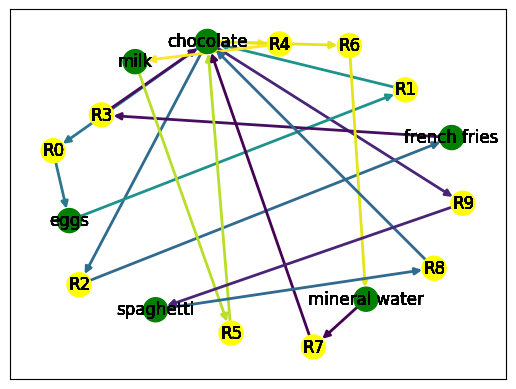

In [82]:
import networkx as nx
import matplotlib.pyplot as plt  
import numpy as np

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw_networkx(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in pos:  # raise text positions
        nx.draw_networkx_labels(G1, pos)
        

draw_graph(rules_mlxtend, 10) 

In [55]:
!pip install --upgrade networkx

     ---------------------------------------- 2.1/2.1 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4
